<a href="https://colab.research.google.com/github/josefstrnad/01_dataset_house_prices_regression/blob/main/House_prices_project_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Modules (Libraries) and loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
!git clone https://github.com/josefstrnad/01_dataset_house_prices_regression

fatal: destination path '01_dataset_house_prices_regression' already exists and is not an empty directory.


In [ ]:
df_train = pd.read_csv(f"/content/01_dataset_house_prices_regression/train.csv")
df_test = pd.read_csv(f"/content/01_dataset_house_prices_regression/test.csv")
df_sub = pd.read_csv(f"/content/01_dataset_house_prices_regression/sample_submission.csv")

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Pre-processing

In [ ]:
df_new = pd.concat([df_train, df_test], axis=0)

In [ ]:
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
for column in df_new.dtypes.sort_values().index:
    print(f"{column}: {df_new[column].dtype}")

Id: int64
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
YearRemodAdd: int64
YearBuilt: int64
OverallCond: int64
OverallQual: int64
Fireplaces: int64
TotRmsAbvGrd: int64
MiscVal: int64
MSSubClass: int64
WoodDeckSF: int64
OpenPorchSF: int64
EnclosedPorch: int64
3SsnPorch: int64
ScreenPorch: int64
PoolArea: int64
YrSold: int64
MoSold: int64
LotArea: int64
TotalBsmtSF: float64
GarageCars: float64
BsmtHalfBath: float64
GarageYrBlt: float64
GarageArea: float64
BsmtUnfSF: float64
BsmtFullBath: float64
BsmtFinSF2: float64
SalePrice: float64
BsmtFinSF1: float64
LotFrontage: float64
MasVnrArea: float64
GarageFinish: object
Condition1: object
Neighborhood: object
GarageQual: object
GarageCond: object
PavedDrive: object
LandSlope: object
LotConfig: object
BsmtFinType2: object
LandContour: object
LotShape: object
Alley: object
PoolQC: object
Fence: object
MiscFeature: object
Street: object
MSZoning: objec

In [ ]:
df_new.isnull().sum().sort_values(ascending = False)[0:40]

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

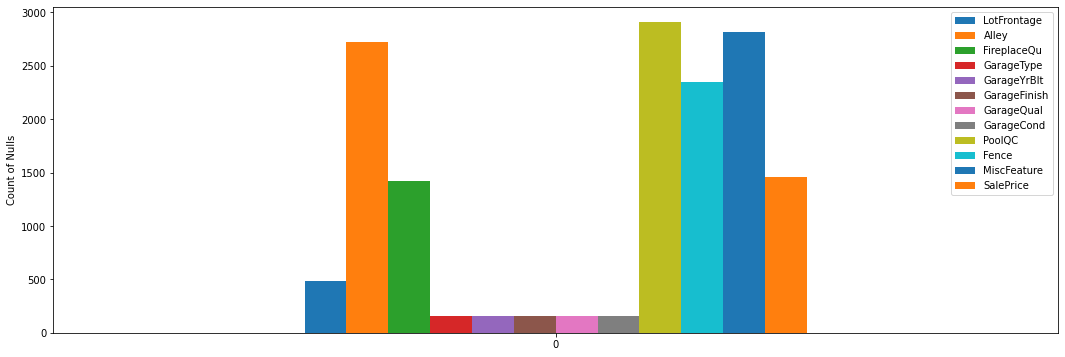

In [ ]:
null_counts = df_new.isnull().sum(axis=0).to_frame().T

# set the column names and plot the result
null_counts.columns = df_new.columns

# filter null counts to only include columns with more than 100 nulls
null_counts = null_counts.loc[:, null_counts.max() > 100]

# create a new figure with a size of 18x6 inches
fig = plt.figure(figsize=(18, 6))

# plot the null counts with the new figure object
null_counts.plot(kind='bar', rot=0, stacked=False, ax=fig.add_subplot(111))
plt.ylabel('Count of Nulls')
plt.show()

In [ ]:
# Drop columns with high percentage of missing values
df_new.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

In [ ]:
# Store the list of object columns in a variable
obj_cols = df_new.select_dtypes(include=['object']).columns.tolist()

# Get dummy variables for the object columns
dummy_cols = pd.get_dummies(df_new[obj_cols], drop_first=False)
dummy_cols

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
dummy_cols.isna().sum().sort_values(ascending=False)[:40]

MSZoning_C (all)       0
BsmtFinType1_Rec       0
BsmtCond_Fa            0
BsmtCond_Gd            0
BsmtCond_Po            0
BsmtCond_TA            0
BsmtExposure_Av        0
BsmtExposure_Gd        0
BsmtExposure_Mn        0
BsmtExposure_No        0
BsmtFinType1_ALQ       0
BsmtFinType1_BLQ       0
BsmtFinType1_GLQ       0
BsmtFinType1_LwQ       0
BsmtFinType1_Unf       0
HeatingQC_Fa           0
BsmtFinType2_ALQ       0
BsmtFinType2_BLQ       0
BsmtFinType2_GLQ       0
BsmtFinType2_LwQ       0
BsmtFinType2_Rec       0
BsmtFinType2_Unf       0
Heating_Floor          0
Heating_GasA           0
Heating_GasW           0
Heating_Grav           0
Heating_OthW           0
Heating_Wall           0
BsmtQual_TA            0
BsmtQual_Gd            0
BsmtQual_Fa            0
BsmtQual_Ex            0
Exterior2nd_Plywood    0
Exterior2nd_Stone      0
Exterior2nd_Stucco     0
Exterior2nd_VinylSd    0
Exterior2nd_Wd Sdng    0
Exterior2nd_Wd Shng    0
MasVnrType_BrkCmn      0
MasVnrType_BrkFace     0


In [ ]:
df_new.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_new.shape

(2919, 75)

In [ ]:
dummy_cols.shape

(2919, 234)

In [ ]:
df_new2 = pd.concat([df_new, dummy_cols], axis=1)
df_new2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_test_no_object = df_new2.select_dtypes(exclude=['object'])
data_test_no_object

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_test_no_object[['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars', 'BsmtFinSF1']] = data_test_no_object[['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars', 'BsmtFinSF1']].fillna(0) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_test_no_object.isnull().sum().sort_values(ascending=False)[:40]
df_st = data_test_no_object

In [ ]:
df_st.shape

(2919, 271)

In [ ]:
train = df_st.iloc[:1460]
train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test = df_st.iloc[1460:]
test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test = test.drop(['SalePrice'], axis=1)

In [ ]:
test.shape

(1459, 270)

# MODEL

In [ ]:
y = train.SalePrice.values.reshape(-1,1) 
X = train.drop(['Id','SalePrice'], axis=1).values #.reshape(-1,1) 

In [ ]:
y.shape

(1460, 1)

In [ ]:
X.shape

(1460, 269)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Machine learning 
MLA = [
    #LinearRegression(),
    #DecisionTreeRegressor(),
    #RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=250, max_depth = 5),          #GradientBoostingRegressor(n_estimators=250, max_depth = 5),
    #GradientBoostingRegressor()
    #SVR(kernel = "rbf", C = 100, gamma = 0.1, epsilon = 1) #better results for SVR changing these paramters
]


from sklearn.model_selection import cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error

skf = StratifiedKFold(n_splits = 5)

In [ ]:
for a in MLA:
  a.fit(X_train, y_train)
  scores = cross_val_score(a, X_train, y_train, cv = 5) 
  accu_train = a.score(X_train, y_train)
  accu_test = a.score(X_test, y_test)
  rmse = mean_squared_error(y_test, a.predict(X_test), squared= False)
  print(a.__class__.__name__)
  print("CV score: ", round(scores.mean(), 3))  
  print("Train score: ", round(accu_train, 3))
  print("Test score: ", round(accu_test, 3))
  print("RMSE: ", round(rmse, 2))
  print("---------------")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GradientBoostingRegressor
CV score:  0.856
Train score:  0.999
Test score:  0.873
RMSE:  29400.94
---------------


# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
            'n_estimators':[100, 150, 200, 250 , 300, 350],
            'max_depth':[2, 5, 7, 10]
            }

In [ ]:
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             verbose=1)

In [ ]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
grid.best_score_

0.8611206357102095

# Final results

In [ ]:
df_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
train.shape

(1460, 271)

In [ ]:
test.shape


(1459, 270)

In [ ]:
kaggle_Id = test[['Id']]
kaggle_Id

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [ ]:
test = test.drop(['Id'], inplace=False, axis=1) 
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test.shape

(1459, 269)

# Predict

In [ ]:
y_pred = a.predict(test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
y_pred.shape

(1459,)

In [ ]:
y_pred

array([121851.54560392, 156611.4935208 , 186630.71261128, ...,
       163175.45846729, 116050.36759139, 223196.07267889])

# Data for Kaggle

In [ ]:
df_newsub = kaggle_Id.copy()
df_newsub['SalePrice'] = y_pred

In [ ]:
df_newsub

,Id,SalePrice
0,1461,121851.545604
1,1462,156611.493521
2,1463,186630.712611
3,1464,192421.515065
4,1465,189492.108158
...,...,...
1454,2915,75647.285859
1455,2916,72219.424900
1456,2917,163175.458467
1457,2918,116050.367591


In [ ]:
df_newsub.to_csv("reg_submission.csv", index = False)